# MC886 - Aprendizado de Máquina

## Projeto Final - Objetivos de Desenvolvimento Sustentável - Educação de Qualidade

### Alunos:
* André Soranzzo Mota      RA 166404
* Diego André Pedro        RA 166542
* Gabriel Akahoshi Collado RA 197141
* Rebecca Moreira Messias  RA 186416

### 1. Introdução
Os Objetivos de Desenvolvimento Sustentável são um apelo global à ação para acabar com a pobreza, proteger o meio ambiente e o clima e garantir que as pessoas, em todos os lugares, possam desfrutar de paz e de prosperidade. Estes são os objetivos para os quais as Nações Unidas estão contribuindo a fim de que possamos atingir a Agenda 2030 no Brasil. O quarto objetivo é sobre a Educação de Qualidade. Esse objetivo visa garantir o acesso à educação inclusiva, de qualidade e equitativa, e promover oportunidades de aprendizagem ao longo da vida para todos.

No decorrer dos anos o governo realiza censos e disponibiliza os resultados para consulta. A forma que esses dados são disponibilizados não é de forma acessível e que todos consigam interpretar facilmente. Normalmente essas informações são encontradas em planilhas e as pessoas que tiverem interesse precisam analisar para tirar suas conclusões. Outro ponto é que os dados não são centralizados. Diferente métricas e taxas estão distribuídas em planilhas diferentes e em diferentes plataformas do governo. Isso acaba tornando o processo dificultoso, além de já ser difícil a compreensão e interpretação dessas informações, o que acaba não sendo acessível a todos.

O prazo dos Objetivos de Desenvolvimento Sustentável é 2030 e em 2022 será ano de eleições no Brasil. Considerando esses dois pontos, o objetivo desse projeto é classificar quais governos investiram e conseguiram atingir boas taxas na educação nos últimos anos. Também objetivamos prever quais partidos tenderão a investir mais em educação nos próximos anos na intenção de conscientizar e ajudar os eleitores a escolherem seus candidatos e votar conscientemente.

### 2. Ideia do Projeto e Conjunto de Dados

Para este projeto, nós decidimos desenvolver uma solução no intuito de melhorar a qualidade da educação no Brasil. Para determinar os fatores que compõe essa qualidade, nós pesquisamos dados do IBGE para as medidas quantitativas, e nisso encontramos uma infinidade de valores.
Para lidar com os valores de medição da educação, optamos por dividir os dados em grupos, baseando-se nas suas similaridades, que constituem nas seguintes métricas:

- **Governança:** grupo formado por valores que medem a competência do governo em prover recursos e tomar decisões voltadas para a melhoria geral do sistema educacional brasileiro. \
- **Inserção Populacional:** Valores que abrangem o envolvimento populacional e intenção de aprendizagem direta no ambiente educacional, incluindo evasão escolar do aluno e frequência das aulas. \
- **Capacitação Educacional:** Neste grupo colocamos valores que medem a eficácia do sistema educacional atual, em termos de combate ao analfabetismo e formação da população.

O cálculo dos scores baseou-se na escala dos próprios valores. Uma vez que nossos valores usados foram todos em formato de porcentagem, a soma desses valores daria uma pontuação cumulativa ao longo dos anos avaliados (de 2000 a 2021), contribuindo positiva ou negativamente com base no fato de ter sido uma melhoria ou não para o sistema educacional. \
A princípio, decidimos apontar nossa solução para medir a conclusão do ensino fundamental e médio e a taxa de analfabetismo de adolescentes e adultos, pois são pontos retratados no artigo da ONU a respeito do objetivo do nosso projeto.

### 3. Plano de Desenvolvimento
Como primeiro objetivo, decidimos apresentar uma resolução para a medição de completude dos graus primários e secundários de infantes e as taxas de analfabetismo de jovens e adultos. Para isso utilizamos primariamente o grupo de valores contidos em Capacitação Educacional.

Para efetivar um impacto real, nosso grupo decidiu encontrar a melhor combinação partidária que demonstrou a melhor taxa de melhoria na nota do grupo em seu período de vigência. Utilizamos inicialmente a abordagem de regressão para predizermos esta efetividade ao longo dos anos, até 2021.

Com base na composição partidária de cada ano, incluindo o ministro da educação, foi possível reter o efeito inciso da mesma em cada nota individual por ano. Tendo essa informação acessível e disponibilizada ao público o efeito estimado seria a diminuição do efeito de "fake news" sobre decisões eleitorais pautadas em propostas de educação, uma vez que a fonte de dados é conhecida e livre de influências partidárias (IBGE).

### 4. Implementação

#### 4.1 Bibliotecas utilizadas
As bibliotecas utilizadas foram:
- **numpy**: manipular arrays
- **pandas**: manipular os dados
- **matplotlib**: plotar os gráficos
- **math**: cálculo de operações matemáticas
- **sklearn**: cálculo de regressões linear e polinomial

In [3]:
import numpy as np
import pandas as pd
import math

Todos os dados pesquisados foram inseridos na tabela *features.csv* e abreviações e siglas foram utilizadas nos nomes das colunas. Segue abaixo a legenda para cada sigla:
- Partido_Pres = Partido do Presidente
- Min_Educacao = Ministro da Educação
- Partido_Min = Partido do Ministro da Educação
- Pop_Total = População Total
- TFEB = Taxa de Frequência Escolar Bruta. \
Exemplo 1: TFEB_0_3 = Taxa de Frequência Escolar Bruta de 0 a 3 anos. \
Exemplo 2: TFEB_25_Mais = Taxa de Frequência Escolar Bruta de 25 anos ou mais.
- NI25M = Nível de Instrução de pessoas com 25 anos ou mais \
- Sem = Sem instrução
- En_Fun = Ensino Fundamental
- En_Med = Ensino Médio
- En_Sup = Ensino Superior
- In = Incompleto
- Com = Completo
- TA15M = Taxa de Analfabetismo de pessoas com 15 anos ou mais
- Ger = Geral
- Urb = Urbano
- Rur = Rural
- H = Homem
- M = Mulher
- Bra = Brancos
- Pre_Par = Pretos ou pardos
- GI = Grupos de idade \
Exemplo 1: TA15M_GI_15_19 = Taxa de Analfabetismo de pessoas do grupo de idade entre 15 a 19 anos. \
Exemplo 2: TA15M_GI_65_M = Taxa de Analfabetismo de pessoas do grupo de idade de 65 anos ou mais.
- IPDPE = Investimento Público Direto por Estudante
- TodosNiveis = Todos os níveis de ensino
- EB = Educação Básica
- EI = Educação Infantil \
Exemplo 1: IPDPE_1_4_Serie = Investimento Público Direto por Estudante de 1ª a 4ª Séries ou Anos Iniciais
- IPDPE_Prop_ES_Sobre_EB = Proporção da Educação Superior sobre a Educação Básica (Estudante)
- TRE = Taxa de Rendimento Escolar
- TAP = Taxa de Aprovação
- TRE = Taxa de Reprovação
- TAB = Taxa de Abandono

In [4]:
df = pd.read_csv('features.csv', encoding='utf-8')
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,Pop_Total,Desemprego,TFEB_Total,TFEB_0_3,TFEB_4_5,...,IPDPE_5_8_Series,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TRE_TAP_EF,TRE_TAP_EM,TRE_TRE_EF,TRE_TRE_EM,TRE_TAB_EF,TRE_TAB_EM
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2367.0,2274.0,25845.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2579.0,2557.0,25539.0,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2484.0,1723.0,23653.0,9.8,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,NaN,NaN,NaN,NaN,NaN,...,2395.0,1911.0,20669.0,8.6,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Luiz Inácio Lula da Silva,PT,Tarso Genro,PT,NaN,NaN,31.7,13.4,61.5,...,2670.0,1745.0,19567.0,7.6,78.7,73.3,13.0,10.4,8.3,16.0
5,2005,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,13.0,62.8,...,2880.0,1850.0,21083.0,7.7,79.5,73.2,13.0,11.5,7.5,15.3
6,2006,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,15.4,67.5,...,3785.0,2571.0,21826.0,6.6,NaN,NaN,NaN,NaN,NaN,NaN
7,2007,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.7,17.0,70.0,...,4301.0,3119.0,23062.0,5.9,83.1,74.1,12.1,12.7,4.8,13.2
8,2008,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.2,18.1,72.7,...,5007.0,3609.0,21317.0,4.8,83.8,74.9,11.8,12.3,4.4,12.8
9,2009,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,29.8,18.4,74.8,...,5530.0,3805.0,23941.0,4.9,85.2,75.9,11.1,12.6,3.7,11.5


#### 4.2 Tratamento de Dados

Após importar o arquivo `features.csv` já tratado, contendo os dados necessários de cada ano, separamos as colunas para cada métrica (Inserção populacional, Capacitação educacional e Governança).

In [5]:
df['TDsp'] = (df['Desemprego']/df['Pop_Total']) * 100
df = df.drop(columns=['Desemprego', 'Pop_Total'])
old_df = df.copy()

In [6]:
# Inserção populacional
print(df.columns[5:14])

# Capacitação educacional
print(df.columns[14:35].union(df.columns[43:49]))

# Governança
print(df.columns[35:43].union(df.columns[49:]))

Index(['TFEB_Total', 'TFEB_0_3', 'TFEB_4_5', 'TFEB_6_10', 'TFEB_11_14',
       'TFEB_6_14', 'TFEB_15_17', 'TFEB_18_24', 'TFEB_25_Mais'],
      dtype='object')
Index(['NI25M_En_Fun_Com', 'NI25M_En_Fun_In', 'NI25M_En_Med_Com',
       'NI25M_En_Med_In', 'NI25M_En_Sup_Com', 'NI25M_En_Sup_In ', 'NI25M_Sem',
       'TA15M_Bra', 'TA15M_GI_15_19', 'TA15M_GI_20_24', 'TA15M_GI_25_34',
       'TA15M_GI_35_44', 'TA15M_GI_45_54', 'TA15M_GI_55_64', 'TA15M_GI_65_M',
       'TA15M_Ger', 'TA15M_H', 'TA15M_M', 'TA15M_Pre_Par', 'TA15M_Rur',
       'TA15M_Urb', 'TRE_TAB_EF', 'TRE_TAB_EM', 'TRE_TAP_EF', 'TRE_TAP_EM',
       'TRE_TRE_EF', 'TRE_TRE_EM'],
      dtype='object')
Index(['IPDPE_1_4_Serie', 'IPDPE_5_8_Series', 'IPDPE_EB', 'IPDPE_EI',
       'IPDPE_EM', 'IPDPE_ES', 'IPDPE_Prop_ES_Sobre_EB', 'IPDPE_TodosNiveis',
       'TDsp'],
      dtype='object')


#### 4.3 Pesos dos dados para cálculo da métrica

Fazendo uso de um dicionário, atribuímos um peso de valor inteiro para cada coluna, a fim de categorizar o dado como influência fraca ou forte, positiva ou negativa. As definições de constantes para um grupo inteiro de dados facilitou a fase de ajustes dos pesos para melhor predição.

In [7]:
IPDPE = 0.005
TRE = 1
w = {
    'TDsp': -10,
    'TFEB_Total': 1,
    'TFEB_0_3': 1,
    'TFEB_4_5': 1,
    'TFEB_6_10': 1,
    'TFEB_11_14': 1,
    'TFEB_6_14': 1,
    'TFEB_15_17': 1,
    'TFEB_18_24': 1,
    'TFEB_25_Mais': 1,
    'NI25M_Sem': -1,
    'NI25M_En_Fun_In': -1,
    'NI25M_En_Fun_Com': 1,
    'NI25M_En_Med_In': -1,
    'NI25M_En_Med_Com': 1,
    'NI25M_En_Sup_In ': -1,
    'NI25M_En_Sup_Com': 1,
    'TA15M_Ger': -1,
    'TA15M_Urb': -1,
    'TA15M_Rur': -1,
    'TA15M_H': -1,
    'TA15M_M': -1,
    'TA15M_Bra': -1,
    'TA15M_Pre_Par': -1,
    'TA15M_GI_15_19': -1,
    'TA15M_GI_20_24': -1,
    'TA15M_GI_25_34': -1,
    'TA15M_GI_35_44': -1,
    'TA15M_GI_45_54': -1,
    'TA15M_GI_55_64': -1,
    'TA15M_GI_65_M': -1,
    'IPDPE_TodosNiveis': IPDPE,
    'IPDPE_EB': IPDPE,
    'IPDPE_EI': IPDPE,
    'IPDPE_1_4_Serie': IPDPE,
    'IPDPE_5_8_Series': IPDPE,
    'IPDPE_EM': IPDPE,
    'IPDPE_ES': IPDPE,
    'IPDPE_Prop_ES_Sobre_EB': IPDPE,
    'TRE_TAP_EF': TRE,
    'TRE_TAP_EM': TRE,
    'TRE_TRE_EF': -TRE,
    'TRE_TRE_EM': -TRE,
    'TRE_TAB_EF': -TRE,
    'TRE_TAB_EM': -TRE,
}

#### 4.4 Atribuição de valor não nulo para valores faltantes

Para trabalhar com os dados, foi necessário atribuir um valor para os valores faltantes, e a primeira estratégia adotada foi a de calcular a média de cada coluna e atribuir para os valores nulos. No entanto, ao montar os gráficos, ficou claro pelas discrepâncias entre valores reais e estimados da métrica que esta não era a melhor abordagem.
Assim, a segunda e definitiva estratégia foi calcular o valor não-nulo mais próximo do valor faltante e usa-lo nos espaços vazios, o que ficou mais próximo do valor real e, portanto, ajudou nas estimativas e predição ao final do projeto.

In [8]:
means = df.mean(axis = 0, skipna = True)
means

Ano                        2010.000000
TFEB_Total                   28.806667
TFEB_0_3                     22.906667
TFEB_4_5                     78.693333
TFEB_6_10                    98.180000
TFEB_11_14                   97.953333
TFEB_6_14                    98.060000
TFEB_15_17                   84.680000
TFEB_18_24                   31.033333
TFEB_25_Mais                  4.720000
NI25M_Sem                     7.500000
NI25M_En_Fun_In              33.950000
NI25M_En_Fun_Com              8.800000
NI25M_En_Med_In               4.150000
NI25M_En_Med_Com             26.550000
NI25M_En_Sup_In               3.500000
NI25M_En_Sup_Com             15.500000
TA15M_Ger                     8.840000
TA15M_Urb                     6.646667
TA15M_Rur                    21.186667
TA15M_H                       9.080000
TA15M_M                       8.600000
TA15M_Bra                     5.360000
TA15M_Pre_Par                12.120000
TA15M_GI_15_19                1.286667
TA15M_GI_20_24           

In [9]:
from itertools import zip_longest

# Código obtido do site a seguir:
# https://codereview.stackexchange.com/questions/172113/best-way-to-get-nearest-non-zero-value-from-list)
def nearest_non_zero(lst, idx):
    if lst[idx] > 0:
        return lst[idx]
    before, after = lst[:idx], lst[idx+1:]
    for b_val, a_val in zip_longest(reversed(before), after, fillvalue=0):
        if b_val > 0:
            return b_val
        if a_val > 0:
            return a_val
    else:
        return 0

In [10]:
# Substitui valores nulos por não-nulo mais próximo
for column in df:
    dfObj = df[column]
    line = dfObj.values
    if not isinstance(line[0], str):
        for i in range(line.size):
            if math.isnan(line[i]):
                line[i] = nearest_non_zero(line, i)

In [11]:
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,TFEB_Total,TFEB_0_3,TFEB_4_5,TFEB_6_10,TFEB_11_14,...,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TRE_TAP_EF,TRE_TAP_EM,TRE_TRE_EF,TRE_TRE_EM,TRE_TAB_EF,TRE_TAB_EM,TDsp
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,2274.0,25845.0,11.0,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,2557.0,25539.0,10.5,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,1723.0,23653.0,9.8,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,31.7,13.4,61.5,95.9,96.4,...,1911.0,20669.0,8.6,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
4,2004,Luiz Inácio Lula da Silva,PT,Tarso Genro,PT,31.7,13.4,61.5,95.9,96.4,...,1745.0,19567.0,7.6,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
5,2005,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,31.2,13.0,62.8,96.4,96.7,...,1850.0,21083.0,7.7,79.5,73.2,13.0,11.5,7.5,15.3,3.332829
6,2006,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,31.2,15.4,67.5,96.9,96.9,...,2571.0,21826.0,6.6,79.5,73.2,13.0,11.5,7.5,15.3,3.332829
7,2007,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,30.7,17.0,70.0,97.0,97.0,...,3119.0,23062.0,5.9,83.1,74.1,12.1,12.7,4.8,13.2,3.332829
8,2008,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,30.2,18.1,72.7,97.6,97.3,...,3609.0,21317.0,4.8,83.8,74.9,11.8,12.3,4.4,12.8,3.332829
9,2009,Luiz Inácio Lula da Silva,PT,Fernando Haddad,PT,29.8,18.4,74.8,97.7,97.5,...,3805.0,23941.0,4.9,85.2,75.9,11.1,12.6,3.7,11.5,3.332829


#### 4.5 Cálculo das métricas

Utilizando a tabela sem valores nulos, os três grupos de colunas correspondendo aos respectivos grupos de métrica e o dicionário de pesos, calculou-se cada uma das 3 métricas para que pudessem ser utilizadas na regressão.

In [12]:
def score(line):
    score = 0
    # Não usa as linhas iniciais pro cálculo (não quantitativas)
    for column, val in zip(line.index, line):
        if not isinstance(val, str):
            # Se não tem valor, atribui a média
            if math.isnan(val):
                val = means[column]
            w_val = w[column] * val
            score += w_val
    return score

In [13]:
score_governanca = []
score_insercao_pop = []
score_cap_educacional = []

for i in range(len(df)):
    line = df.iloc[i]
    
    insercao_pop = line[5:14]
    cap_educacional = pd.concat([line[14:35],line[43:49]])
    governanca = pd.concat([line[35:43], line[49:]])
    
    score_governanca.append(score(governanca))
    score_insercao_pop.append(score(insercao_pop))
    score_cap_educacional.append(score(cap_educacional))
    
    print(f'Governança: {score(governanca):.2f}, Inserção Pop.: {score(insercao_pop):.2f}, \
Cap. Educacional: {score(cap_educacional):.2f}')

Governança: 171.26, Inserção Pop.: 514.60, Cap. Educacional: -81.20
Governança: 171.36, Inserção Pop.: 514.60, Cap. Educacional: -81.20
Governança: 158.15, Inserção Pop.: 514.60, Cap. Educacional: -81.20
Governança: 144.62, Inserção Pop.: 514.60, Cap. Educacional: -81.20
Governança: 143.36, Inserção Pop.: 514.60, Cap. Educacional: -81.20
Governança: 154.26, Inserção Pop.: 515.50, Cap. Educacional: -73.50
Governança: 175.23, Inserção Pop.: 524.20, Cap. Educacional: -62.70
Governança: 198.90, Inserção Pop.: 527.10, Cap. Educacional: -46.80
Governança: 206.29, Inserção Pop.: 533.20, Cap. Educacional: -40.40
Governança: 230.70, Inserção Pop.: 536.40, Cap. Educacional: -30.50
Governança: 261.81, Inserção Pop.: 536.40, Cap. Educacional: -25.10
Governança: 287.62, Inserção Pop.: 538.50, Cap. Educacional: -5.00
Governança: 292.43, Inserção Pop.: 539.50, Cap. Educacional: -1.20
Governança: 324.59, Inserção Pop.: 546.20, Cap. Educacional: 7.00
Governança: 320.77, Inserção Pop.: 548.30, Cap. Educ

### 4.6 Análise dos Resultados

As predições foram feitas a partir das regressões linear e polinomial oferecidas pela biblioteca `sklearn` e estão implementadas nas funções `linear_reg` e `pol_reg`. Já a função `plot_reg` é responsável por criar o gráfico e exibir a métrica passado por parâmetro junto com a regressão desejada.

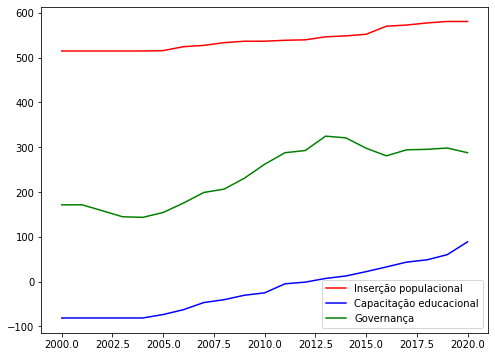

In [22]:
import matplotlib.pyplot as plt
t = np.arange(2000, 2021, 1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(t, score_insercao_pop, 'r', label='Inserção populacional')
ax.plot(t, score_cap_educacional, 'b', label='Capacitação educacional')
ax.plot(t, score_governanca, 'g', label='Governança')

legend = ax.legend(loc='best', shadow=False)

**Inserção populacional:**\
De 2000 a 2004, época do governo FHC (PSDB), não houve alteração na inserção populacional. Entre 2015 e 2016, governo da presidenta Dilma Rousseff (PT), houve um aumento da Inserção Populacional, como é possível notar pela curva mais acentuada no trecho. Os ministros da educação do período foram José Henrique Paim (Sem partido) e José Mendonça Filho (DEM).

**Capacitação educacional:**\
A partir de 2004, governos de Luiz Inácio Lula da Silva (PT), Dilma Rousseff (PT), Michel Temer (PMDB) e Jair Bolsonaro (PSL, e depois Sem partido), a capacidade educacional apenas aumentou de maneira praticamente linear.

**Governança:**\
Entre 2004 e 2013, nos governos de Luiz Inácio Lula da Silva e os dois primeiros anos do governo de Dilma Rousseff (PT), houve um crescimento da Governança. Entre 2014 e 2016, final do primeiro mandato e primeira metade do segundo mandato de Dilma Rousseff, houve um decrescimento da Governança. Entre 2016 e 2018 houve um leve crescimento, quase irrelevante. A partir de 2019, governo de Jair Bolsonaro, apesar de não haver muitos dados, o gráfico apresenta uma tendência de queda.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def linear_reg(X, y_pred):
    model = LinearRegression().fit(X, y_pred)
    a = model.coef_[0]
    b = model.intercept_
    return (a, b, model)

def pol_reg(X, y_pred, degree):
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X, y_pred)
    return polyreg

In [25]:
def plot_reg(score, label, degree=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    model = None

    ax.plot(t, score, 'r', label=label)
    X = np.arange(2000, 2021, 1)
    X_pred = np.linspace((1,2000), (21,2020), 21)
    
    X_future = np.arange(2000, 2031, 1)
    X_pred_future = np.linspace((1,2000), (31,2030), 31)
    if degree:
        model = pol_reg(X_pred, score, degree)
        X_input = X_future.reshape(-1, 1)
        
        ax.plot(X_input, model.predict(X_pred_future), 'g--', label='Regressão polinomial')
    else:
        a, b, model = linear_reg(X_pred, score)
        X_input = X_future.reshape(-1, 1)
        
        ax.plot(X_input, model.predict(X_pred_future), 'g--', label='Regressão linear')

    legend = ax.legend(loc='best', shadow=False)

    plt.show()
    return model

Aplicando a técnica de regressão linear e polinomial nos dados de Capacitação educacional, Governança e Inserção populacional, podemos ter uma ideia de qual o melhor candidato e/ou partido a ser escolhido a fim de atingir as metas de Desenvolvimento Sustentável da ONU até 2030.

#### 4.6.1 Capacitação Educacional

A capacitação educacional não apresentou nenhum crescimento de 2000 a 2004, durante o governo de FHC (PSDB). A curva cresce em todos os governos a partir de 2005, sendo possível ver uma inclinação maior da curva entre 2004 e 2007 (primeiro mandato de Lula/PT, tendo como Ministro da Educação Fernando Haddad/PT). Também é possível ver um crescimento súbito entre 2010 e 2011 (primeira metade do primeiro mandato de Dilma/PT, sendo o Ministro da Educação ainda o Fernando Haddad). Após 2012, houve sucessivas trocas de Ministro da Educação, ocasionando uma diminuição no ritmo de crescimento da curva. Há um salto brusco de 2019 para 2020, governo de Jair Bolsonaro, que também presenciou sucessivas trocas de Ministro da Educação. Este fato pode ser explicado devido à pandemia da Covid-19 iniciada em 2020. O ensino migrou para remoto e as consequências disso ainda não foram completamente elucidadas, mas é de conhecimento que os dados fornecidos pelo INPE a partir de 2019 não são muito confiáveis, visto que a evasão escolar aumentou muito devido ao abismo da desigualdade social no Brasil, fato este que não é possível de ser observado nos dados fornecidos pelo INPE.\
Pode-se concluir então que o único governo que realmente teve um péssimo desempenho no quesito **capacitação educacional**, tendo em vista as metas estabelecidas pela ONU, é o governo de Fernando Henrique Cardoso (PSDB).

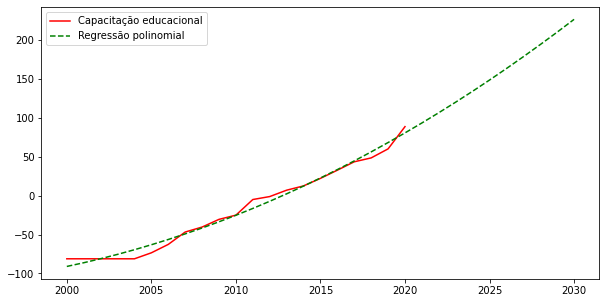

Previsão para 2030: 226.59375


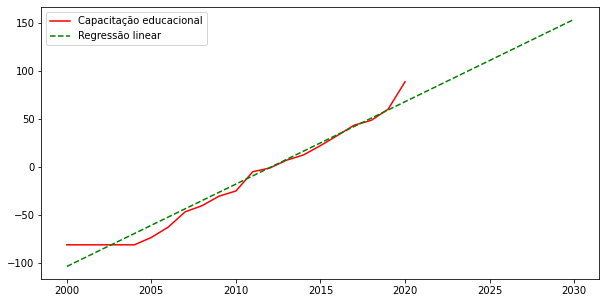

Previsão para 2030: 153.76277056277104


In [33]:
model = plot_reg(score_cap_educacional, 'Capacitação educacional', 2)
print(f'Previsão para 2030: {model.predict(np.array([31, 2030]).reshape(1, -1))[0]}')
model = plot_reg(score_cap_educacional, 'Capacitação educacional')
print(f'Previsão para 2030: {model.predict(np.array([31, 2030]).reshape(1, -1))[0]}')

#### 4.6.2 Governança

Entre os anos 2000 e 2004, governo FCH, a Governança só declinou. Entre 2005 e 2013, governo Lula e primeira metade do primeiro mandato de Dilma, houve um crescimento considerável da Governança. Entre 2014 e 2016, ainda governo Dilma, a Governança apresentou queda considerável. Houve leve tendência de subida entre 2017 e 2018 (mandato de Temer, do PMDB) e passou a apresentar tendência de queda entre 2019 e 2020 (mandato de Jair Bolsonaro, atualmente Sem partido).\
Considerando o gráfico de **regressão polinomial**, as chances de alcançarmos as metas estabelecidas pelas Nações Unidas são nulas caso mantivermos no poder os presidentes Michel Temer, Jair Bolsonaro e Dilma.
Considerando agora o gráfico de **regressão linear**, as chances são baixas para a presidenta Dilma, visto que, apesar de ter tido uma melhora considerável na governança no início de seu mandato, teve forte queda a partir de 2013. As chances permanecem ainda nulas para Temer e Bolsonaro.\
Considerando tanto o gráfico de regressão linear quanto o de regressão polinomial, as chances são altas se o presidente eleito for Lula. As chances são nulas para os governos FHC, Temer e Bolsonaro. As chances são média altas para o governo Dilma, tendo em vista que foi houve resultados positivos, apesar do desempenho ruim do final do seu mandato.

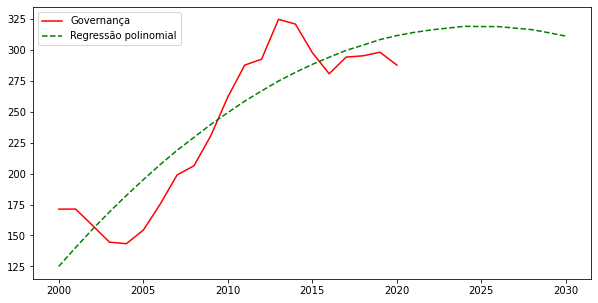

Previsão para 2030: 311.0


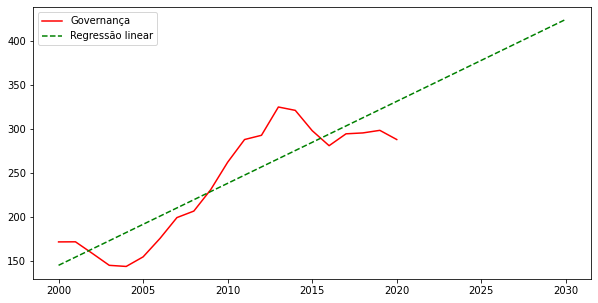

Previsão para 2030: 424.20825727272495


In [34]:
model = plot_reg(score_governanca, 'Governança', 2)
print(f'Previsão para 2030: {model.predict(np.array([31, 2030]).reshape(1, -1))[0]}')
model = plot_reg(score_governanca, 'Governança')
print(f'Previsão para 2030: {model.predict(np.array([31, 2030]).reshape(1, -1))[0]}')

#### 4.6.3 Inserção populacional

De 2000 a 2004, governo FHC, não houve aumento algum da inserção populacional. Entre 2005 e 2009, mandato de Lula, é possível ver um crescimento da inserção populacional. De 2010 (fim do governo Lula) até meados de 2013 (fim do 1º mandato de Dilma), praticamente não houve crescimento, a curva permaneceu estável. Entre 2015 e 2016, metade do segundo mandato de Dilma, antes de seu impeachment, houve um rápido aumento da inserção populacional. Logo após o impeachment de Dilma, no início do governo Temer, o crescimento continuou mas de maneira menos intensa. A partir de 2018, governo de Jair Bolsonaro, o crescimento cessou e a curva tende a manter-se estável, no sentido de que não houve alterações. \
Sendo assim, considerando a curva de regressão linear, as chances do Brasil atingir as metas de educação da ONU são:
* Nulas caso os presidentes sejam Fernando Henrique Cardoso ou Jair Bolsonaro
* Altas caso a presidenta seja Dilma Rousseff
* Média altas caso o presidente seja Lula.

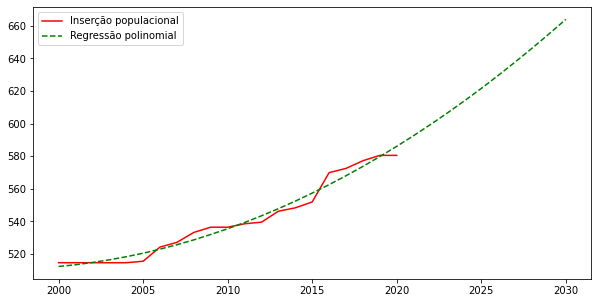

Previsão para 2030: 664.03125


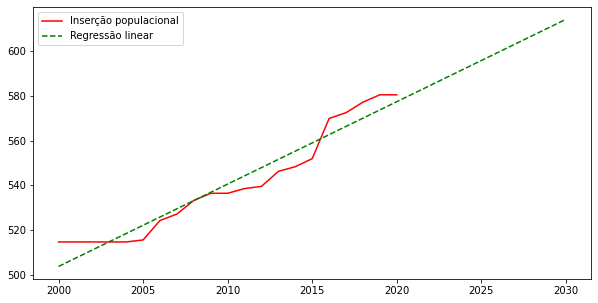

Previsão para 2030: 614.2909090909088


In [35]:
model = plot_reg(score_insercao_pop, 'Inserção populacional', 2)
print(f'Previsão para 2030: {model.predict(np.array([31, 2030]).reshape(1, -1))[0]}')
model = plot_reg(score_insercao_pop, 'Inserção populacional')
print(f'Previsão para 2030: {model.predict(np.array([31, 2030]).reshape(1, -1))[0]}')